# Практична робота №3
### Студентки групи МІТ-31 (підгрупа 1)
### Борук Дарини Ігорівни

##### 1st task

In [77]:
import pandas as pd
import numpy as np

np.random.seed(0)
n_samples = 1000

data={
    'Housing Area': np.random.randint(50, 201, size=n_samples),
    'Bedrooms': np.random.randint(1, 6, size=n_samples),
    'City Center': np.random.randint(1, 21, size=n_samples)
}

noise = np.random.normal(0, 2, n_samples)

data['Price_target'] = 10 * data['Housing Area'] + 5 * data['Bedrooms'] - 2 * data['City Center'] + noise

df = pd.DataFrame(data)

df.to_csv('PriceData.csv', index=False)
data = pd.read_csv('PriceData.csv')

print("\nDescriptive data statistics:")
print(data.describe())


Descriptive data statistics:
       Housing Area     Bedrooms  City Center  Price_target
count   1000.000000  1000.000000  1000.000000   1000.000000
mean     127.743000     3.032000    10.613000   1271.342715
std       43.476536     1.398188     5.553744    435.522135
min       50.000000     1.000000     1.000000    468.607764
25%       89.000000     2.000000     6.000000    882.342635
50%      132.000000     3.000000    11.000000   1311.273047
75%      165.000000     4.000000    15.000000   1648.112100
max      200.000000     5.000000    20.000000   2014.925556


##### 2nd task

In [78]:
data = data.dropna()

X = data.drop('Price_target', axis=1)
y = data['Price_target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

##### 3rd task

In [79]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

##### 4th task

In [80]:
y_pred_lr = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
def evaluate_model(model, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2
mse_lr, r2_lr = evaluate_model(lr_model, y_test, y_pred_lr)

print(f"Linear Regression: MSE = {mse_lr:.2f}, R^2 = {r2_lr:.2f}")

Linear Regression: MSE = 3.33, R^2 = 1.00


##### 5th task

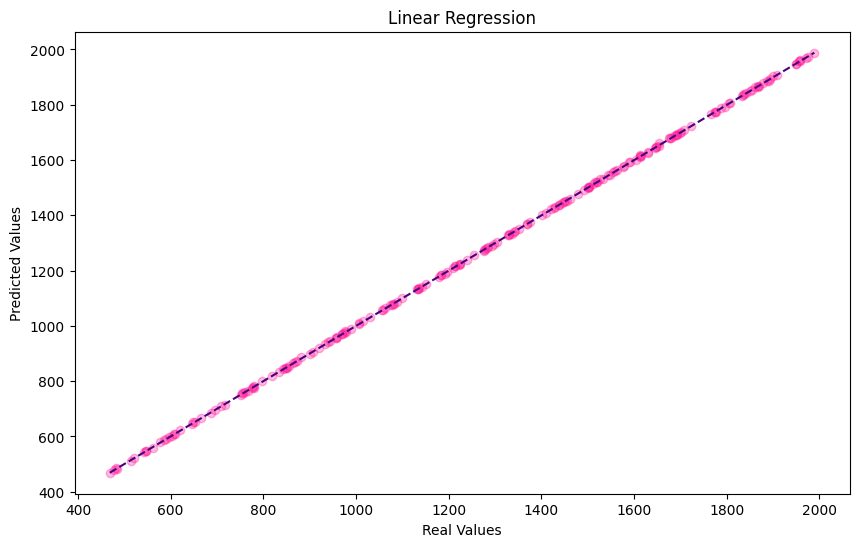

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.title("Linear Regression")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.scatter(y_test, y_pred_lr, c='deeppink', alpha=0.3)

plt.plot([min(y_test), max(y_test)], [min(y_pred_lr), max(y_pred_lr)], ls='--', c ='indigo')

plt.show()


##### 6th task

As we can see from the 4rth task which is about "Evaluation of the model", our metric results are quite great for estimating the quality of the model and its ability to predict housing prices based on inputted features: MSE = 3.33 (the lower it is, the better the result) and R^2 = 1.00 (r2 score for perfect model is 1.00)
We can also look at the graph where the predicted values almost all lie on the same straight line that represents the ideal results
From these points, we can conclude that this model is qualitative and accurate in terms of predicting the housing price based on the entered features